In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(-0.5, 6527.5, 4895.5, -0.5)

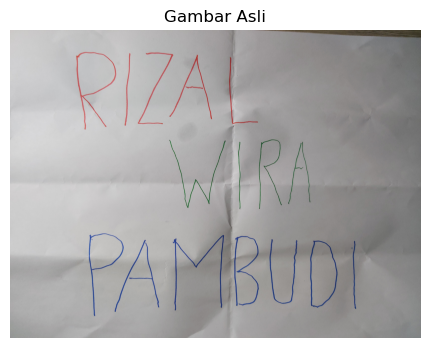

In [8]:
gambar = cv2.imread('warnanama2.jpg')
gambar_rgb = cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,4))
plt.imshow(gambar_rgb)
plt.title('Gambar Asli')
plt.axis('off')

In [12]:
gambar_hsv = cv2.cvtColor(gambar, cv2.COLOR_BGR2HSV)
hue = gambar_hsv[:,:,0]

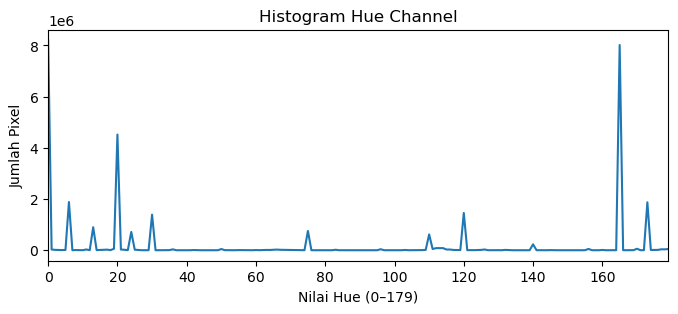

In [14]:
hist_hue = cv2.calcHist([hue], [0], None, [180], [0,180]).flatten()

plt.figure(figsize=(8,3))
plt.plot(hist_hue)
plt.title('Histogram Hue Channel')
plt.xlabel('Nilai Hue (0–179)')
plt.ylabel('Jumlah Pixel')
plt.xlim([0,179])
plt.show()

In [32]:
lembah = []
for i in range(1,179):
    if hist_hue[i] < hist_hue[i-1] and hist_hue[i] < hist_hue[i+1]:
        lembah.append(i)


print("Semua kandidat valley:", lembah)
# Pilih manual yang paling relevan:
thresholds = [20, 90, 150]
print("Threshold terpilih:", thresholds)

Semua kandidat valley: [4, 7, 10, 12, 14, 18, 23, 27, 29, 31, 33, 37, 39, 41, 44, 47, 49, 53, 57, 59, 61, 64, 72, 74, 78, 82, 84, 86, 91, 94, 97, 100, 102, 104, 107, 111, 113, 115, 119, 121, 123, 127, 129, 131, 134, 137, 139, 143, 149, 154, 157, 159, 162, 164, 168, 171, 174, 176, 178]
Threshold terpilih: [20, 90, 150]


In [54]:
# thresholds = [t1, t2, t3]
thresh1, thresh2, thresh3 = thresholds

# Buat fungsi sederhana untuk kategorisasi
kategori = np.zeros_like(hue, dtype=np.uint8)

kategori[np.logical_or(hue <= thresh1, hue >= thresh3)] = 1  
kategori[np.logical_and(hue > thresh1, hue <= thresh2)]   = 2  
kategori[np.logical_and(hue > thresh2, hue < thresh3)]    = 3  


In [56]:
mask_biru  = cv2.inRange(gambar_hsv[:,:,0], thresh2+1, thresh3-1)
mask_hijau = cv2.inRange(gambar_hsv[:,:,0], thresh1+1, thresh2)
mask_merah = cv2.bitwise_or(
    cv2.inRange(gambar_hsv[:,:,0], 0, thresh1),
    cv2.inRange(gambar_hsv[:,:,0], thresh3, 179)
)

In [58]:
biru_gambar          = cv2.bitwise_and(gambar_rgb, gambar_rgb, mask=mask_biru)
merah_biru_gambar    = cv2.bitwise_and(
    gambar_rgb,
    gambar_rgb,
    mask=cv2.bitwise_or(mask_merah, mask_biru)
)
semua_warna_gambar   = cv2.bitwise_and(
    gambar_rgb,
    gambar_rgb,
    mask=cv2.bitwise_or(mask_merah, cv2.bitwise_or(mask_hijau, mask_biru))
)

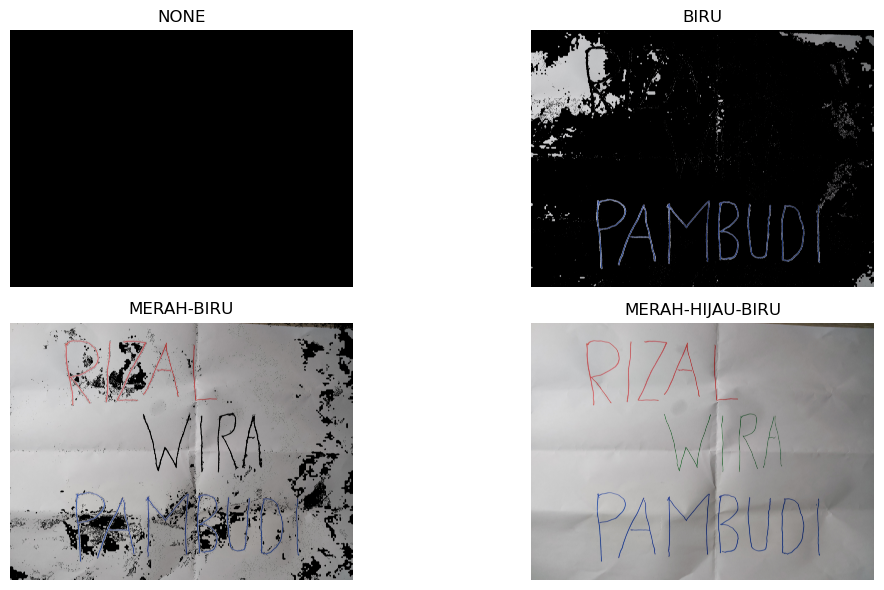

In [60]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

axes[0,0].imshow(np.zeros_like(gambar_rgb))    # “NONE”
axes[0,0].set_title('NONE')
axes[0,1].imshow(biru_gambar)                   # “BIRU”
axes[0,1].set_title('BIRU')
axes[1,0].imshow(merah_biru_gambar)             # “MERAH-BIRU”
axes[1,0].set_title('MERAH-BIRU')
axes[1,1].imshow(semua_warna_gambar)            # “MERAH-HIJAU-BIRU”
axes[1,1].set_title('MERAH-HIJAU-BIRU')

for ax in axes.ravel():
    ax.axis('off')

plt.tight_layout()
plt.show()

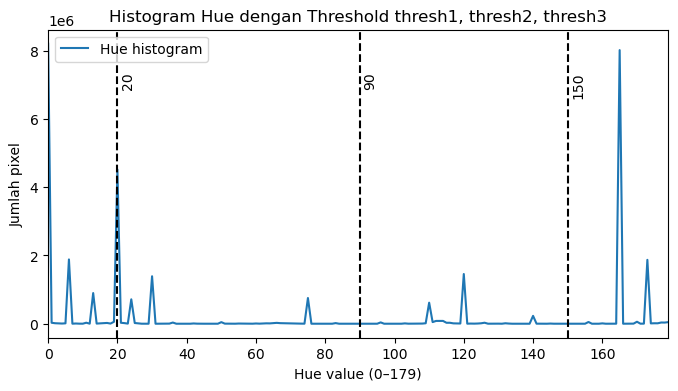

In [44]:
hue_channel = gambar_hsv[:,:,0]
hist_hue = cv2.calcHist([hue_channel], [0], None, [180], [0,180]).flatten()

plt.figure(figsize=(8,4))
plt.plot(hist_hue, label='Hue histogram')
for t in (thresh1, thresh2, thresh3):
    plt.axvline(t, color='k', linestyle='--')
    plt.text(t+1, max(hist_hue)*0.9, str(t), rotation=90, va='top')

plt.title('Histogram Hue dengan Threshold thresh1, thresh2, thresh3')
plt.xlabel('Hue value (0–179)')
plt.ylabel('Jumlah pixel')
plt.xlim(0,179)
plt.legend()
plt.show()